# Data Scraping: Airlines.

1. Este es un proyecto que busca realizar, en primer lugar, una extracción de los datos  de las diferentes aerolineas que se encuentran disponibles en la pagina oficial de **Despegar.com** y de **Atrapalo.com**. El proceso que se va a seguir es mediante el Web Scraping, en el cual se usara **Selenium** para extraer toda clase de informacion util para el proyecto, para que al final se obtenga una base de datos de la pagina mencionada.

2. En segundo lugar, se manipulará la base de datos mediante el paquete **pandas** para poder manipular la base de datos y analizarla, mediante tecnicas de procesamiento del dato.

3. Por ultimo, se pretende visualizar los datos con los paquetes **Matplotlib** y **Seaborn** una vez que se haya manipulado correctamente en el apartado del procesamiento de los datos. Los graficos comunes que se utilizacion serian los siguientes: Histogramas, diagrama de cajas, grafico de barras y graficos de pastel.


* Lo interesante de este trabajo no radica solo en la extraccion de la data que se encuentran en la pagina oficial, sino que va a permitir generar valor agregado al publico en general y a las empresas de aerolineas, por los siguientes motivos:

    * En el caso de las empresas: buscar ampliar y conocer su publico objetivo.
    * En el caso de las empresas: mejorar las condiciones de los vuelos, para que los vuelos sean mas placenteros.
    * Publico en general: Conocer los precios de las diferentes aerolineas disponibles acorde a sus necesidades de forma    rapida.
    * Publico en general: Conocer la hora y la fecha de salida como de llegada al lugar de destino, sin tener que buscar en el navegador web.

* El publico al que va dirigido este proyecto serian:
   * Empresarios que buscan establecer nuevas empresas en el territorio europeo.
   * Estudiantes que van a realizar estudios universitarios.
   * Personas que planean trabajar en Europa por un largo tiempo.
   * Familiares que buscan realizar una nueva vida en Europa.

# 1. Importando las librerias:

In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
import time

import warnings
warnings.filterwarnings("ignore")
sns.set_theme()

* https://www.atrapalo.pe/ms/results?journeys=LIM%2CBCN%2C20220410&adults=1&children=0&babies=0&isResident=false&isLargeFamily=false&countryContext=PE&language=es_PE&device=desktop&transport_type=FLIGHT&app=web&test=B&companies=AR%2CAM%2CUX%2CAF%2CAA%2CAV%2CCM%2CIB%2CB6%2CKL%2CLA%2CNK%2CTK%2CUA&page=0&fieldOrder=atrapalo&airports=LIM%2CBCN


In [46]:
PATH="https://www.atrapalo.pe/ms/results?journeys=LIM%2CBCN%2C20220410&adults=1&children=0&babies=0&isResident=false&isLargeFamily=false&countryContext=PE&language=es_PE&device=desktop&transport_type=FLIGHT&app=web&test=B&companies=AR%2CAM%2CUX%2CAF%2CAA%2CAV%2CCM%2CIB%2CB6%2CKL%2CLA%2CNK%2CTK%2CUA&page=0&fieldOrder=atrapalo&airports=LIM%2CBCN"
driver=webdriver.Chrome(executable_path="C:/Selenium/chromedriver.exe")
driver.get(PATH)
driver.maximize_window()
time.sleep(6)

# 1.1.Extraemos los datos de la primera pagina:

In [25]:
vuelos=driver.find_elements_by_xpath('//div[@class="sc-dJjYzT styles__CardContainer-sc-pp754f-1 dXjtCY eIAskt"]')
print(f"La cantidad de vuelos que se encontraron en la primera pagina fueron de {len(vuelos)}")

La cantidad de vuelos que se encontraron en la primera pagina fueron de 25


# 1.2. Extraemos todos los datos de las paginas en total:

In [47]:
def info(element):
    aerolinea=element.find_element_by_xpath('.//div[@class="sc-dlVxhl styles__CompanyContainer-sc-11cw88s-0 ktswCS evvPTk styles__StyledCompany-sc-1ornisu-1 hYVtEY"]/span').text
    escalas=element.find_element_by_xpath('.//div[@class="TagContainer-sc-153d48d-0 bcVhUV"]/span').text
    duracion=element.find_element_by_xpath('.//div[@class="sc-dlVxhl styles__ScaleContainer-sc-e2vz5e-1 ieiYOS gYgLzi"]/span').text
    salida=element.find_element_by_xpath('.//span[@class="sc-hBUSln darCtt JourneyTime__HourFont-sc-1ej0v4k-1 cjymPo"]/span').text
    llegada=element.find_element_by_xpath(".//div[@class='sc-dlVxhl styles__ContainerInfoJourney-sc-e2vz5e-0 ktswCS eTvHQZ']/div[contains(@class,'jrxQKb')]").text
    persona=element.find_element_by_xpath('.//span[@class="sc-hBUSln darCtt styles__TripText-sc-1hhvl2t-4 ctPRqH"]').text
    origen=element.find_element_by_xpath('//*[@id="container-searchResult"]/div/div[4]/div/div/div[1]/div/div/div[1]/div[1]/div/div/div[3]/div/div[1]/span[2]').text
    destino=element.find_element_by_xpath('//*[@id="container-searchResult"]/div/div[4]/div/div/div[1]/div/div/div[1]/div[1]/div/div/div[3]/div/div[3]/span[2]').text
    precio=element.find_element_by_xpath('.//span[@class="sc-hBUSln darCtt styles__Price-sc-1hhvl2t-3 HraOy"]/span[1]').text

    dict_info = {
        "Aerolinea":aerolinea,
        "Escalas":escalas,
        "Duracion":duracion,
        "Salida":salida,
        "Llegada":llegada,
        "Persona":persona,
        "Origen":origen,
        "Destino":destino,
        "Precio":precio
    }
    
    return dict_info


## 1.3. Obteniendo los detalles de cada vuelo:

In [48]:
def primera_pagina(driver):
    print("Iniciamos el scraper.....")
    vuelos=driver.find_elements_by_xpath('//div[@class="sc-dJjYzT styles__CardContainer-sc-pp754f-1 dXjtCY eIAskt"]')
    print(f"La cantidad de vuelos que se encontraron en la primera pagina fueron de {len(vuelos)}")
    
    script= []
    
    for element in vuelos:
        resultado=info(element)
        script.append(resultado)
    return script

data=primera_pagina(driver)

Iniciamos el scraper.....
La cantidad de vuelos que se encontraron en la primera pagina fueron de 25


In [49]:
data_0=pd.DataFrame(data)
data_0.head(4)

,Aerolinea,Escalas,Duracion,Salida,Llegada,Persona,Origen,Destino,Precio
0,Aeromexico,2 escalas,26h 30m,07:05,16:35\n+1\nBCN,por persona,LIM,BCN,USD607
1,LATAM Airlines,1 escala,25h 40m,00:20,09:00\n+1\nBCN,por persona,LIM,BCN,USD696
2,Aeromexico,2 escalas,33h 05m,00:30,16:35\n+1\nBCN,por persona,LIM,BCN,USD607
3,Aeromexico,2 escalas,32h 50m,07:05,22:55\n+1\nBCN,por persona,LIM,BCN,USD611


## 2. Extraemos todos los datos de la pagina 2:

In [50]:
for i in range(0,1):
    print(f"Vamos a la siguiente pagina {i+1}")
    driver.get("https://www.atrapalo.pe/ms/results?journeys=LIM%2CBCN%2C20220410&adults=1&children=0&babies=0&isResident=false&isLargeFamily=false&countryContext=PE&language=es_PE&device=desktop&transport_type=FLIGHT&app=web&test=B&companies=AR%2CAM%2CUX%2CAF%2CAA%2CAV%2CCM%2CIB%2CB6%2CKL%2CLA%2CNK%2CTK%2CUA&page={}&fieldOrder=atrapalo&airports=LIM%2CBCN".format(i+1))
    time.sleep(7)
    

Vamos a la siguiente pagina 1


In [51]:
def segunda_pagina(driver):
    print("Iniciamos el scraper.....")
    vuelos_2=driver.find_elements_by_xpath('//div[@class="sc-dJjYzT styles__CardContainer-sc-pp754f-1 dXjtCY eIAskt"]')
    print(f"La cantidad de vuelos que se encontraron en la primera pagina fueron de {len(vuelos_2)}")
    
    script= []
    
    for element in vuelos_2:
        resultado=info(element)
        script.append(resultado)
    return script

data1=segunda_pagina(driver)

Iniciamos el scraper.....
La cantidad de vuelos que se encontraron en la primera pagina fueron de 25


In [52]:
data_1=pd.DataFrame(data1)
data_1.head(4)

,Aerolinea,Escalas,Duracion,Salida,Llegada,Persona,Origen,Destino,Precio
0,Avianca,2 escalas,24h 45m,11:05,18:50\n+1\nBCN,por persona,LIM,BCN,USD993
1,Avianca,2 escalas,28h 55m,06:55,18:50\n+1\nBCN,por persona,LIM,BCN,USD954
2,KLM Royal Dutch Airlines,2 escalas,20h 00m,19:55,22:55\n+1\nBCN,por persona,LIM,BCN,"USD1,066"
3,Avianca,2 escalas,26h 15m,11:05,20:20\n+1\nBCN,por persona,LIM,BCN,USD993


## 3. Extraemos todos los datos de la pagina 3

In [53]:
for i in range(1,2):
    print(f"Vamos a la siguiente pagina :{i+1}")
    driver.get("https://www.atrapalo.pe/ms/results?journeys=LIM%2CBCN%2C20220410&adults=1&children=0&babies=0&isResident=false&isLargeFamily=false&countryContext=PE&language=es_PE&device=desktop&transport_type=FLIGHT&app=web&test=B&companies=AR%2CAM%2CUX%2CAF%2CAA%2CAV%2CCM%2CIB%2CB6%2CKL%2CLA%2CNK%2CTK%2CUA&page={}&fieldOrder=atrapalo&airports=LIM%2CBCN".format(i+1))
    time.sleep(8)

Vamos a la siguiente pagina :2


In [54]:
def tercera_pagina(driver):
    print("Iniciamos el scraper.....")
    vuelos_3=driver.find_elements_by_xpath('//div[@class="sc-dJjYzT styles__CardContainer-sc-pp754f-1 dXjtCY eIAskt"]')
    print(f"La cantidad de vuelos que se encontraron en la primera pagina fueron de {len(vuelos_3)}")
    
    script= []
    
    for element in vuelos_3:
        resultado=info(element)
        script.append(resultado)
    return script

data2=tercera_pagina(driver)

Iniciamos el scraper.....
La cantidad de vuelos que se encontraron en la primera pagina fueron de 25


In [55]:
data_2=pd.DataFrame(data2)
data_2.head(4)

,Aerolinea,Escalas,Duracion,Salida,Llegada,Persona,Origen,Destino,Precio
0,Avianca,2 escalas,46h 55m,06:55,12:50\n+2\nBCN,por persona,LIM,BCN,"USD1,002"
1,LATAM Airlines,1 escala,29h 25m,22:30,10:55\n+2\nBCN,por persona,LIM,BCN,"USD1,226"
2,LATAM Airlines,2 escalas,21h 40m,12:25,17:05\n+1\nBCN,por persona,LIM,BCN,"USD1,375"
3,LATAM Airlines,2 escalas,27h 10m,12:25,22:35\n+1\nBCN,por persona,LIM,BCN,"USD1,319"


## 4. Ultima pagina.

In [56]:
for i in range(2,3):
    print(f"Vamos a la siguiente pagina {i+1}")
    driver.get("https://www.atrapalo.pe/ms/results?journeys=LIM%2CBCN%2C20220410&adults=1&children=0&babies=0&isResident=false&isLargeFamily=false&countryContext=PE&language=es_PE&device=desktop&transport_type=FLIGHT&app=web&test=B&companies=AR%2CAM%2CUX%2CAF%2CAA%2CAV%2CCM%2CIB%2CB6%2CKL%2CLA%2CNK%2CTK%2CUA&page={}&fieldOrder=atrapalo&airports=LIM%2CBCN".format(i+1))
    time.sleep(10)

Vamos a la siguiente pagina 3


In [57]:
def cuarta_pagina(driver):
    print("Iniciamos el scraper.....")
    vuelos_4=driver.find_elements_by_xpath('//div[@class="sc-dJjYzT styles__CardContainer-sc-pp754f-1 dXjtCY eIAskt"]')
    print(f"La cantidad de vuelos que se encontraron en la primera pagina fueron de {len(vuelos_4)}")
    
    script= []
    
    for element in vuelos_4:
        resultado=info(element)
        script.append(resultado)
    return script

data3=cuarta_pagina(driver)


Iniciamos el scraper.....
La cantidad de vuelos que se encontraron en la primera pagina fueron de 7


In [58]:
data_3=pd.DataFrame(data3)
data_3.head(4)

,Aerolinea,Escalas,Duracion,Salida,Llegada,Persona,Origen,Destino,Precio
0,LATAM Airlines,2 escalas,23h 25m,12:25,18:50\n+1\nBCN,por persona,LIM,BCN,"USD2,399"
1,LATAM Airlines,2 escalas,24h 10m,08:05,15:15\n+1\nBCN,por persona,LIM,BCN,"USD2,513"
2,LATAM Airlines,1 escala,26h 40m,00:20,10:00\n+1\nBCN,por persona,LIM,BCN,"USD2,951"
3,Aerolineas Argentinas,2 escalas,51h 30m,22:25,08:55\n+3\nBCN,por persona,LIM,BCN,"USD2,773"


## 5. Creacion de un Dataframe

In [59]:
df=pd.concat([data_0,data_1,data_2,data_3], axis=0).reset_index(drop=True)
#df.tail(6)

In [67]:
df.to_csv("output.csv", index=False)

In [61]:
driver.quit()

## 6.Vuelos para el 9 de abril 

* https://www.atrapalo.pe/ms/results?journeys=LIM%2CBCN%2C20220409&adults=1&children=0&babies=0&isResident=false&isLargeFamily=0&countryContext=PE&language=es_PE&transport_type=FLIGHT&app=ATRAPALO&test=B&companies=AR%2CAM%2CUX%2CAF%2CAA%2CAV%2CCM%2CDL%2CIB%2CB6%2CKL%2CLA%2CNK%2CTK%2CUA%2CVH&page=0

In [6]:
url="https://www.atrapalo.pe/ms/results?journeys=LIM%2CBCN%2C20220409&adults=1&children=0&babies=0&isResident=false&isLargeFamily=0&countryContext=PE&language=es_PE&transport_type=FLIGHT&app=ATRAPALO&test=B&companies=AR%2CAM%2CUX%2CAF%2CAA%2CAV%2CCM%2CDL%2CIB%2CB6%2CKL%2CLA%2CNK%2CTK%2CUA%2CVH&page=0"
driver=webdriver.Chrome(executable_path="C:/Selenium/chromedriver.exe")
driver.get(url)
driver.maximize_window()
time.sleep(10)

In [78]:
page=driver.find_elements_by_xpath('//div[@class="sc-dJjYzT styles__CardContainer-sc-pp754f-1 dXjtCY eIAskt"]')

## 7.Extracion de todos los datos de todas las paginas encontradas.

In [7]:
try:
    contador=0
    informacion = []
    
    for i in range(0,4):
        print(f"Scrapeamos la pagina: {i+1}")
        driver.get("https://www.atrapalo.pe/ms/results?journeys=LIM%2CBCN%2C20220409&adults=1&children=0&babies=0&isResident=false&isLargeFamily=0&countryContext=PE&language=es_PE&transport_type=FLIGHT&app=ATRAPALO&test=B&companies=AR%2CAM%2CUX%2CAF%2CAA%2CAV%2CCM%2CDL%2CIB%2CB6%2CKL%2CLA%2CNK%2CTK%2CUA%2CVH&page={}".format(i))
        time.sleep(10)
        pages=driver.find_elements_by_xpath('//div[@class="sc-dJjYzT styles__CardContainer-sc-pp754f-1 dXjtCY eIAskt"]')
        print(f"En la pagina {i+1} se encontraron {len(pages)}")
        contador=contador+len(pages)
        
        for element in pages:
            
            aerolinea=element.find_element_by_xpath('.//div[@class="sc-dlVxhl styles__CompanyContainer-sc-11cw88s-0 ktswCS evvPTk styles__StyledCompany-sc-1ornisu-1 hYVtEY"]/span').text
            escalas=element.find_element_by_xpath('.//div[@class="TagContainer-sc-153d48d-0 bcVhUV"]/span').text
            duracion=element.find_element_by_xpath('.//div[@class="sc-dlVxhl styles__ScaleContainer-sc-e2vz5e-1 ieiYOS gYgLzi"]/span').text
            salida=element.find_element_by_xpath('.//span[@class="sc-hBUSln darCtt JourneyTime__HourFont-sc-1ej0v4k-1 cjymPo"]/span').text
            llegada=element.find_element_by_xpath(".//div[@class='sc-dlVxhl styles__ContainerInfoJourney-sc-e2vz5e-0 ktswCS eTvHQZ']/div[contains(@class,'jrxQKb')]").text
            persona=element.find_element_by_xpath('.//span[@class="sc-hBUSln darCtt styles__TripText-sc-1hhvl2t-4 ctPRqH"]').text
            origen=element.find_element_by_xpath('//*[@id="container-searchResult"]/div/div[4]/div/div/div[1]/div/div/div[1]/div[1]/div/div/div[3]/div/div[1]/span[2]').text
            destino=element.find_element_by_xpath('//*[@id="container-searchResult"]/div/div[4]/div/div/div[1]/div/div/div[1]/div[1]/div/div/div[3]/div/div[3]/span[2]').text
            precio=element.find_element_by_xpath('.//span[@class="sc-hBUSln darCtt styles__Price-sc-1hhvl2t-3 HraOy"]/span[1]').text

            dict_info = {
                "Aerolinea":aerolinea,
                "Escalas":escalas,
                "Duracion":duracion,
                "Salida":salida,
                "Llegada":llegada,
                "Persona":persona,
                "Origen":origen,
                "Destino":destino,
                "Precio":precio
                        }
            
            print(dict_info)
        
    
    print(f"Numero total de elementos encontrados {contador}")
    #driver.quit()
        
except Exception:
    print("Upss hubo un error en el codigo o en la pagina.....")
    driver.quit()    

Scrapeamos la pagina: 1
En la pagina 1 se encontraron 25
{'Aerolinea': 'Aeromexico', 'Escalas': '2 escalas', 'Duracion': '26h 30m', 'Salida': '07:05', 'Llegada': '16:35\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD607'}
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '26h 10m', 'Salida': '00:20', 'Llegada': '09:30\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD707'}
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '29h 40m', 'Salida': '00:20', 'Llegada': '13:00\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD707'}
{'Aerolinea': 'Aeromexico', 'Escalas': '2 escalas', 'Duracion': '42h 50m', 'Salida': '07:05', 'Llegada': '08:55\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD559'}
{'Aerolinea': 'KLM Royal Dutch Airlines', 'Escalas': '1 escala', 'Duracion': '18h 05m', 'Salida': '19:55', 'Llegada': '

{'Aerolinea': 'KLM Royal Dutch Airlines', 'Escalas': '2 escalas', 'Duracion': '20h 00m', 'Salida': '19:55', 'Llegada': '22:55\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,186'}
{'Aerolinea': 'Air Europa', 'Escalas': '1 escala', 'Duracion': '15h 35m', 'Salida': '10:20', 'Llegada': '08:55\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,244'}
{'Aerolinea': 'Iberia', 'Escalas': '1 escala', 'Duracion': '14h 30m', 'Salida': '19:35', 'Llegada': '17:05\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,261'}
{'Aerolinea': 'Avianca', 'Escalas': '1 escala', 'Duracion': '31h 35m', 'Salida': '18:35', 'Llegada': '09:10\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,063'}
{'Aerolinea': 'Avianca', 'Escalas': '2 escalas', 'Duracion': '41h 15m', 'Salida': '18:35', 'Llegada': '18:50\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino'

{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '51h 05m', 'Salida': '23:25', 'Llegada': '09:30\n+3\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,751'}
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '23h 35m', 'Salida': '16:00', 'Llegada': '22:35\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD2,214'}
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '23h 45m', 'Salida': '00:40', 'Llegada': '07:25\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD2,326'}
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '32h 50m', 'Salida': '23:25', 'Llegada': '15:15\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD2,517'}
{'Aerolinea': 'Air France', 'Escalas': '2 escalas', 'Duracion': '17h 50m', 'Salida': '18:00', 'Llegada': '18:50\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'L

In [8]:
driver.quit()

In [18]:
lista_1 = [{'Aerolinea': 'Aeromexico', 'Escalas': '2 escalas', 'Duracion': '26h 30m', 'Salida': '07:05', 'Llegada': '16:35\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD607'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '26h 10m', 'Salida': '00:20', 'Llegada': '09:30\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD707'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '29h 40m', 'Salida': '00:20', 'Llegada': '13:00\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD707'},
{'Aerolinea': 'Aeromexico', 'Escalas': '2 escalas', 'Duracion': '42h 50m', 'Salida': '07:05', 'Llegada': '08:55\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD559'},
{'Aerolinea': 'KLM Royal Dutch Airlines', 'Escalas': '1 escala', 'Duracion': '18h 05m', 'Salida': '19:55', 'Llegada': '21:00\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD882'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '34h 45m', 'Salida': '00:20', 'Llegada': '18:05\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD707'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '28h 35m', 'Salida': '00:20', 'Llegada': '11:55\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD789'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '36h 10m', 'Salida': '00:20', 'Llegada': '19:30\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD707'},
{'Aerolinea': 'American Airlines', 'Escalas': '2 escalas', 'Duracion': '23h 55m', 'Salida': '23:50', 'Llegada': '06:45\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD875'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '28h 20m', 'Salida': '22:30', 'Llegada': '09:50\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD825'},
{'Aerolinea': 'Aeromexico', 'Escalas': '2 escalas', 'Duracion': '50h 30m', 'Salida': '07:05', 'Llegada': '16:35\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD559'},
{'Aerolinea': 'American Airlines', 'Escalas': '1 escala', 'Duracion': '24h 35m', 'Salida': '23:50', 'Llegada': '07:25\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD875'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '39h 45m', 'Salida': '00:20', 'Llegada': '23:05\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD707'},
{'Aerolinea': 'KLM Royal Dutch Airlines', 'Escalas': '1 escala', 'Duracion': '15h 55m', 'Salida': '19:55', 'Llegada': '18:50\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,029'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '25h 40m', 'Salida': '00:20', 'Llegada': '09:00\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD913'},
{'Aerolinea': 'Avianca', 'Escalas': '2 escalas', 'Duracion': '18h 45m', 'Salida': '18:35', 'Llegada': '20:20\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,005'},
{'Aerolinea': 'United Airlines', 'Escalas': '2 escalas', 'Duracion': '35h 40m', 'Salida': '23:25', 'Llegada': '18:05\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD810'},
{'Aerolinea': 'Delta', 'Escalas': '1 escala', 'Duracion': '17h 00m', 'Salida': '09:00', 'Llegada': '09:00\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,041'},
{'Aerolinea': 'Avianca', 'Escalas': '1 escala', 'Duracion': '15h 05m', 'Salida': '11:05', 'Llegada': '09:10\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,077'},
{'Aerolinea': 'Iberia', 'Escalas': '1 escala', 'Duracion': '17h 45m', 'Salida': '19:35', 'Llegada': '20:20\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,051'},
{'Aerolinea': 'Aeromexico', 'Escalas': '2 escalas', 'Duracion': '33h 05m', 'Salida': '00:30', 'Llegada': '16:35\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD908'},
{'Aerolinea': 'Iberia', 'Escalas': '1 escala', 'Duracion': '20h 00m', 'Salida': '19:35', 'Llegada': '22:35\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,067'},
{'Aerolinea': 'Iberia', 'Escalas': '1 escala', 'Duracion': '16h 30m', 'Salida': '19:35', 'Llegada': '19:05\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,125'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '50h 10m', 'Salida': '00:20', 'Llegada': '09:30\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD727'},
{'Aerolinea': 'Avianca', 'Escalas': '2 escalas', 'Duracion': '20h 45m', 'Salida': '11:05', 'Llegada': '14:50\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,091'}]

In [22]:
lista_2 = [{'Aerolinea': 'Air France', 'Escalas': '1 escala', 'Duracion': '16h 10m', 'Salida': '18:00', 'Llegada': '17:10\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,150'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '14h 35m', 'Salida': '19:35', 'Llegada': '17:10\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,170'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '26h 50m', 'Salida': '22:30', 'Llegada': '08:20\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,025'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '14h 50m', 'Salida': '22:30', 'Llegada': '20:20\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,170'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '52h 30m', 'Salida': '00:20', 'Llegada': '11:50\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD727'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '16h 15m', 'Salida': '19:35', 'Llegada': '18:50\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,170'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '53h 40m', 'Salida': '00:20', 'Llegada': '13:00\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD727'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '17h 45m', 'Salida': '19:35', 'Llegada': '20:20\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,170'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '18h 05m', 'Salida': '22:30', 'Llegada': '23:35\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,170'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '27h 15m', 'Salida': '22:30', 'Llegada': '08:45\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,070'},
{'Aerolinea': 'KLM Royal Dutch Airlines', 'Escalas': '2 escalas', 'Duracion': '20h 00m', 'Salida': '18:00', 'Llegada': '21:00\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,168'},
{'Aerolinea': 'Air France', 'Escalas': '2 escalas', 'Duracion': '20h 00m', 'Salida': '19:55', 'Llegada': '22:55\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,169'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '21h 25m', 'Salida': '12:30', 'Llegada': '16:55\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,157'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '29h 25m', 'Salida': '22:30', 'Llegada': '10:55\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,070'},
{'Aerolinea': 'KLM Royal Dutch Airlines', 'Escalas': '2 escalas', 'Duracion': '20h 00m', 'Salida': '19:55', 'Llegada': '22:55\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,186'},
{'Aerolinea': 'Air Europa', 'Escalas': '1 escala', 'Duracion': '15h 35m', 'Salida': '10:20', 'Llegada': '08:55\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,244'},
{'Aerolinea': 'Iberia', 'Escalas': '1 escala', 'Duracion': '14h 30m', 'Salida': '19:35', 'Llegada': '17:05\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,261'},
{'Aerolinea': 'Avianca', 'Escalas': '1 escala', 'Duracion': '31h 35m', 'Salida': '18:35', 'Llegada': '09:10\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,063'},
{'Aerolinea': 'Avianca', 'Escalas': '2 escalas', 'Duracion': '41h 15m', 'Salida': '18:35', 'Llegada': '18:50\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD993'},
{'Aerolinea': 'Iberia', 'Escalas': '1 escala', 'Duracion': '14h 50m', 'Salida': '22:30', 'Llegada': '20:20\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,322'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '31h 50m', 'Salida': '00:20', 'Llegada': '15:10\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,121'},
{'Aerolinea': 'Aeromexico', 'Escalas': '2 escalas', 'Duracion': '49h 25m', 'Salida': '00:30', 'Llegada': '08:55\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD916'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '32h 45m', 'Salida': '00:20', 'Llegada': '16:05\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,121'},
{'Aerolinea': 'KLM Royal Dutch Airlines', 'Escalas': '2 escalas', 'Duracion': '17h 50m', 'Salida': '18:00', 'Llegada': '18:50\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,323'},
{'Aerolinea': 'Delta', 'Escalas': '2 escalas', 'Duracion': '42h 00m', 'Salida': '09:00', 'Llegada': '10:00\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,041'}]

In [25]:
lista_3 = [{'Aerolinea': 'Aeromexico', 'Escalas': '2 escalas', 'Duracion': '57h 05m', 'Salida': '00:30', 'Llegada': '16:35\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD916'},
{'Aerolinea': 'Iberia', 'Escalas': '2 escalas', 'Duracion': '29h 15m', 'Salida': '22:30', 'Llegada': '10:45\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,252'},
{'Aerolinea': 'Avianca', 'Escalas': '2 escalas', 'Duracion': '38h 20m', 'Salida': '11:50', 'Llegada': '09:10\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,165'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '21h 45m', 'Salida': '12:25', 'Llegada': '17:10\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,377'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '23h 25m', 'Salida': '12:25', 'Llegada': '18:50\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,377'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '28h 15m', 'Salida': '00:40', 'Llegada': '11:55\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,325'},
{'Aerolinea': 'Avianca', 'Escalas': '2 escalas', 'Duracion': '28h 55m', 'Salida': '06:55', 'Llegada': '18:50\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,321'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '29h 20m', 'Salida': '00:40', 'Llegada': '13:00\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,325'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '47h 05m', 'Salida': '12:00', 'Llegada': '18:05\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,121'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '31h 30m', 'Salida': '00:40', 'Llegada': '15:10\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,325'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '32h 25m', 'Salida': '00:40', 'Llegada': '16:05\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,325'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '34h 25m', 'Salida': '00:40', 'Llegada': '18:05\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,325'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '35h 50m', 'Salida': '00:40', 'Llegada': '19:30\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,325'},
{'Aerolinea': 'Avianca', 'Escalas': '2 escalas', 'Duracion': '22h 55m', 'Salida': '06:55', 'Llegada': '12:50\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,500'},
{'Aerolinea': 'Avianca', 'Escalas': '2 escalas', 'Duracion': '21h 20m', 'Salida': '18:35', 'Llegada': '22:55\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,539'},
{'Aerolinea': 'Avianca', 'Escalas': '2 escalas', 'Duracion': '24h 55m', 'Salida': '06:55', 'Llegada': '14:50\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,500'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '39h 25m', 'Salida': '00:40', 'Llegada': '23:05\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,339'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '45h 00m', 'Salida': '12:00', 'Llegada': '16:00\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,274'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '40h 50m', 'Salida': '12:00', 'Llegada': '11:50\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,325'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '42h 00m', 'Salida': '12:00', 'Llegada': '13:00\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,325'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '44h 15m', 'Salida': '12:00', 'Llegada': '15:15\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,325'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '26h 50m', 'Salida': '22:55', 'Llegada': '08:45\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,579'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '14h 30m', 'Salida': '19:35', 'Llegada': '17:05\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,739'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '49h 50m', 'Salida': '00:40', 'Llegada': '09:30\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,345'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '21h 40m', 'Salida': '12:25', 'Llegada': '17:05\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,739'}]

In [14]:
lista_4 = [{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '17h 25m', 'Salida': '12:25', 'Llegada': '12:50\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,927'},
{'Aerolinea': 'Avianca', 'Escalas': '2 escalas', 'Duracion': '27h 10m', 'Salida': '06:55', 'Llegada': '17:05\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,927'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '25h 15m', 'Salida': '00:25', 'Llegada': '08:40\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,996'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '51h 05m', 'Salida': '23:25', 'Llegada': '09:30\n+3\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD1,751'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '23h 35m', 'Salida': '16:00', 'Llegada': '22:35\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD2,214'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '23h 45m', 'Salida': '00:40', 'Llegada': '07:25\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD2,326'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '2 escalas', 'Duracion': '32h 50m', 'Salida': '23:25', 'Llegada': '15:15\n+2\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD2,517'},
{'Aerolinea': 'Air France', 'Escalas': '2 escalas', 'Duracion': '17h 50m', 'Salida': '18:00', 'Llegada': '18:50\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD2,850'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '17h 00m', 'Salida': '09:00', 'Llegada': '09:00\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD2,951'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '26h 40m', 'Salida': '00:20', 'Llegada': '10:00\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD2,951'},
{'Aerolinea': 'Aerolineas Argentinas', 'Escalas': '2 escalas', 'Duracion': '51h 30m', 'Salida': '22:25', 'Llegada': '08:55\n+3\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD2,777'},
{'Aerolinea': 'Copa Airlines', 'Escalas': '2 escalas', 'Duracion': '24h 51m', 'Salida': '01:09', 'Llegada': '09:00\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD3,232'},
{'Aerolinea': 'Copa Airlines', 'Escalas': '2 escalas', 'Duracion': '25h 01m', 'Salida': '00:59', 'Llegada': '09:00\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD3,232'},
{'Aerolinea': 'Avianca', 'Escalas': '2 escalas', 'Duracion': '18h 45m', 'Salida': '11:05', 'Llegada': '12:50\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD4,571'},
{'Aerolinea': 'Avianca', 'Escalas': '2 escalas', 'Duracion': '23h 00m', 'Salida': '11:05', 'Llegada': '17:05\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD4,571'},
{'Aerolinea': 'Air France', 'Escalas': '2 escalas', 'Duracion': '20h 50m', 'Salida': '18:00', 'Llegada': '21:50\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD6,120'},
{'Aerolinea': 'LATAM Airlines', 'Escalas': '1 escala', 'Duracion': '21h 40m', 'Salida': '09:05', 'Llegada': '13:45\n+1\nBCN', 'Persona': 'por persona', 'Origen': 'LIM', 'Destino': 'BCN', 'Precio': 'USD14,189'}]

In [36]:
datav1=pd.DataFrame(lista_1)
datav1.shape

(25, 9)

In [37]:
datav2=pd.DataFrame(lista_2)
datav2.shape

(25, 9)

In [38]:
datav3=pd.DataFrame(lista_3)
datav3.shape

(25, 9)

In [39]:
datav4=pd.DataFrame(lista_4)
datav4.shape

(17, 9)

## 7.Jutamos todos los vuelos del 9 de abril.

In [76]:
df_1=pd.concat([datav1,datav2,datav3,datav4], axis=0).reset_index(drop=True)
df_1

,Aerolinea,Escalas,Duracion,Salida,Llegada,Persona,Origen,Destino,Precio
0,Aeromexico,2 escalas,26h 30m,07:05,16:35\n+1\nBCN,por persona,LIM,BCN,USD607
1,LATAM Airlines,2 escalas,26h 10m,00:20,09:30\n+1\nBCN,por persona,LIM,BCN,USD707
2,LATAM Airlines,2 escalas,29h 40m,00:20,13:00\n+1\nBCN,por persona,LIM,BCN,USD707
3,Aeromexico,2 escalas,42h 50m,07:05,08:55\n+2\nBCN,por persona,LIM,BCN,USD559
4,KLM Royal Dutch Airlines,1 escala,18h 05m,19:55,21:00\n+1\nBCN,por persona,LIM,BCN,USD882
...,...,...,...,...,...,...,...,...,...
87,Copa Airlines,2 escalas,25h 01m,00:59,09:00\n+1\nBCN,por persona,LIM,BCN,"USD3,232"
88,Avianca,2 escalas,18h 45m,11:05,12:50\n+1\nBCN,por persona,LIM,BCN,"USD4,571"
89,Avianca,2 escalas,23h 00m,11:05,17:05\n+1\nBCN,por persona,LIM,BCN,"USD4,571"
90,Air France,2 escalas,20h 50m,18:00,21:50\n+1\nBCN,por persona,LIM,BCN,"USD6,120"


In [64]:
df_1.to_csv("df_version2.csv", index=False)

## 8. Juntamos los dos dataframes masivos.

In [74]:
datos_2=pd.read_csv("Downloads/df_version2.csv")
#datos_2

In [73]:
datos_1=pd.read_csv("Downloads/output.csv")
#datos_1

In [72]:
df=pd.concat([datos_1,datos_2], axis=0).reset_index(drop=True)
df.to_csv("Airlines.csv", index=False)

## 9. Analisis de los datos extraidos.

In [40]:
data=pd.read_csv("Documents/Data/Airlines.csv")
data.head(5)

,Aerolinea,Escalas,Duracion,Salida,Llegada,Persona,Origen,Destino,Precio
0,Aeromexico,2 escalas,26h 30m,07:05,16:35\n+1\nBCN,por persona,LIM,BCN,USD607
1,LATAM Airlines,1 escala,25h 40m,00:20,09:00\n+1\nBCN,por persona,LIM,BCN,USD696
2,Aeromexico,2 escalas,33h 05m,00:30,16:35\n+1\nBCN,por persona,LIM,BCN,USD607
3,Aeromexico,2 escalas,32h 50m,07:05,22:55\n+1\nBCN,por persona,LIM,BCN,USD611
4,LATAM Airlines,2 escalas,23h 25m,08:55,15:20\n+1\nBCN,por persona,LIM,BCN,USD784


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Aerolinea  174 non-null    object
 1   Escalas    174 non-null    object
 2   Duracion   174 non-null    object
 3   Salida     174 non-null    object
 4   Llegada    174 non-null    object
 5   Persona    174 non-null    object
 6   Origen     174 non-null    object
 7   Destino    174 non-null    object
 8   Precio     174 non-null    object
dtypes: object(9)
memory usage: 12.4+ KB


## 10. Realizamos algunas modificacion al dataframe

In [41]:
data["Precio"]=data["Precio"].apply(lambda x: str(x)[3:])
data["Llegada"]=data["Llegada"].apply(lambda x: str(x)[:5])
data["Escalas"]=data["Escalas"].apply(lambda x: str(x)[0])
#data["Precio"]=data["Precio"].astype("category")

In [150]:
data["Precio"]=data["Precio"].replace({'1,016': 1016,"1,033":1033,"1,003":1003,"1,063":1063,"1,049":1049,"1,029":1029,
                                       "1,066":1066,"1,123":1123,"1,168":1168,"1,024":1024,"1,037":1037,"1,259":1259,
                                       "1,070":1070,"1,319":1319,"1,246":1246,"1,305":1305,"1,002":1002,"1,226":1226,
                                       "1,375":1375,"1,323":1323,"1,297":1297,"1,337":1337,"1,580":1580,"1,623":1623,
                                       "1,736":1736,"1,667":1667,"1,937":1937,"1,954":1954,"1,687":1687,"2,001":2001,
                                      "2,399":2399,"2,513":2513,"2,951":2951,"2,773":2773,"3,227":3227,"14,168":14168,
                                       "1,005":1005,"1,041":1041,"1,077":1077,"1,051":1051,"1,067":1067,"1,125":1125,
                                       "1,091":1091,"1,150":1150,"1,170":1170,"1,025":1025,"1,169":1169,"1,157":1157,
                                       "1,186":1186,"1,244":1244,"1,261":1261,"1,322":1322,"1,121":1121,'1,252':1252,
                                       '1,165':1165,'1,377':1377,'1,325':1325,'1,321':1321,'1,500':1500,'1,539':1539,
                                      '1,339':1339,'1,274':1274,'1,579':1579,'1,739':1739,'1,345':1345,'1,927':1927,
                                      '1,996':1996,'1,751':1751,'2,214':2214,'2,326':2326,'2,517':2517,'2,850':2850,
                                      '2,777':2777,'3,232':3232,'4,571':4571,'6,120':6120,'14,189':14189})

In [153]:
data["Precio"]=data["Precio"].astype("int")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Aerolinea  174 non-null    object
 1   Escalas    174 non-null    object
 2   Duracion   174 non-null    object
 3   Salida     174 non-null    object
 4   Llegada    174 non-null    object
 5   Persona    174 non-null    object
 6   Origen     174 non-null    object
 7   Destino    174 non-null    object
 8   Precio     174 non-null    int32 
dtypes: int32(1), object(8)
memory usage: 11.7+ KB


In [7]:
data.head(3)

,Aerolinea,Escalas,Duracion,Salida,Llegada,Persona,Origen,Destino,Precio
0,Aeromexico,2,26h 30m,07:05,16:35,por persona,LIM,BCN,607
1,LATAM Airlines,1,25h 40m,00:20,09:00,por persona,LIM,BCN,696
2,Aeromexico,2,33h 05m,00:30,16:35,por persona,LIM,BCN,607


In [11]:
data["Escalas"]=data["Escalas"].astype("int")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Aerolinea  174 non-null    object
 1   Escalas    174 non-null    int32 
 2   Duracion   174 non-null    object
 3   Salida     174 non-null    object
 4   Llegada    174 non-null    object
 5   Persona    174 non-null    object
 6   Origen     174 non-null    object
 7   Destino    174 non-null    object
 8   Precio     174 non-null    object
dtypes: int32(1), object(8)
memory usage: 11.7+ KB


## 11. Analisis Exploratiro de los datos (EDA).

In [59]:
aerolineas=data["Aerolinea"].value_counts()[:]
aerolineas

LATAM Airlines              83
Avianca                     28
Aeromexico                  17
Iberia                      10
KLM Royal Dutch Airlines     9
American Airlines            5
Air France                   5
Copa Airlines                5
JetBlue                      3
Air Europa                   2
United Airlines              2
Aerolineas Argentinas        2
Delta                        2
Spirit                       1
Name: Aerolinea, dtype: int64

* Al parecer las aerolineas que mas se repiten y las que van mas seguidas a Barcelona (España) resultan ser **LATAM Airlines**, **Avianca**, **Aeromexico**, **Iberia**. Despues de todas ellas, se encuentran **KLM**, **American Airlines**, **Air Europa** entre otras. Veamoslo mejor en un grafico para poder interpretarlo mejor.

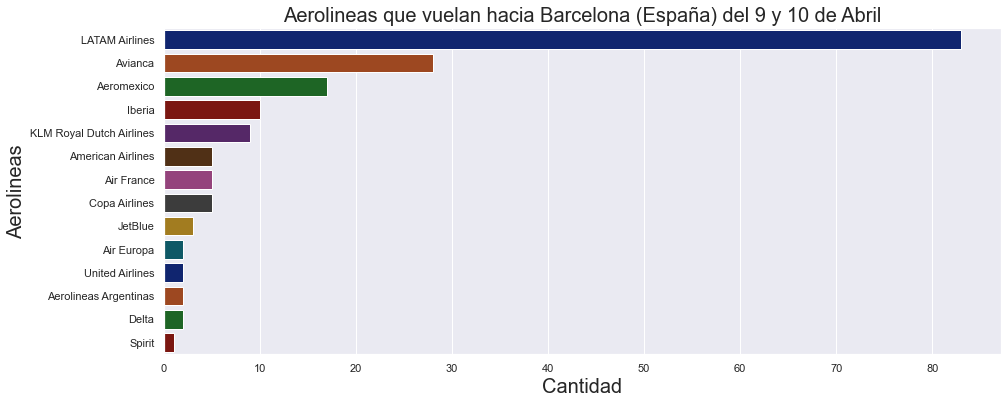

In [68]:
plt.figure(figsize=(15,6))
sns.barplot(x = aerolineas.values, y = aerolineas.index, palette="dark")
plt.title('Aerolineas que vuelan hacia Barcelona (España) del 9 y 10 de Abril', fontsize = 20)
plt.xlabel('Cantidad', fontsize=20)
plt.ylabel('Aerolineas', fontsize=20)
plt.show()

In [70]:
escalas = data["Escalas"].value_counts().to_frame
escalas

2    124
1     50
Name: Escalas, dtype: int64

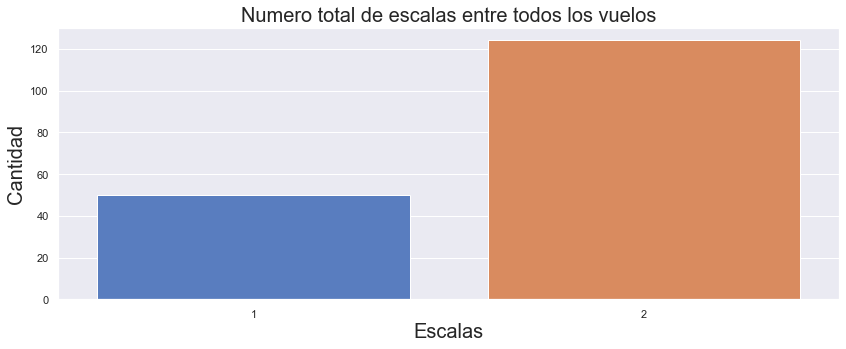

In [78]:
plt.figure(figsize=(14,5))
sns.countplot(x=data["Escalas"], palette="muted" )
plt.title("Numero total de escalas entre todos los vuelos", fontsize=20)
plt.xlabel("Escalas", fontsize=20)
plt.ylabel("Cantidad", fontsize=20)
plt.show()

* Al parecer, durante el 9 y el 10 de Abril, las aerolineas ofrecen mas vuelos con dos escalas que a una escalas. Esto puede ser porque los pasajeros tienen que hacer una parada por el aeropuerto de Mardid (Barajas). Esa puede ser una explicacion clara de lo que se ve en el grafico.

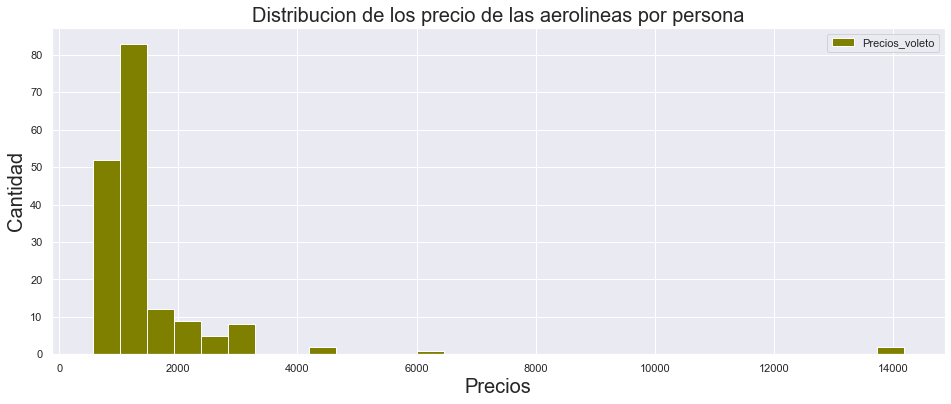

In [155]:
plt.figure(figsize=(16,6))

plt.hist(data["Precio"], bins=30, color="olive", label="Precios_voleto")
plt.title("Distribucion de los precio de las aerolineas por persona", size=20)
plt.xlabel("Precios", size=20)
plt.ylabel("Cantidad", size=20)
plt.legend()
plt.show()

* Al parecer los datos en como estan distribuidos los precios de las aerolineas se encuentran dispersos. Segun la base de datos los precios van desde los 500 dolares hasta los 14000 dolares. Sin embargo, algo interesante es que los precios que mas se repiten se encuentran agrupados hacia la izquierda. Con lo cual se puede concluir que los boletos de avion durante los dias 9 y 10 de abril venden mas boletos barato que caros. 

## Las Aerolineas mas populares.

In [157]:
valorizadas=data[data["Aerolinea"].isin(["LATAM Airlines", "Avianca", "Aeromexico","Iberia"])]
valorizadas.shape

(138, 9)

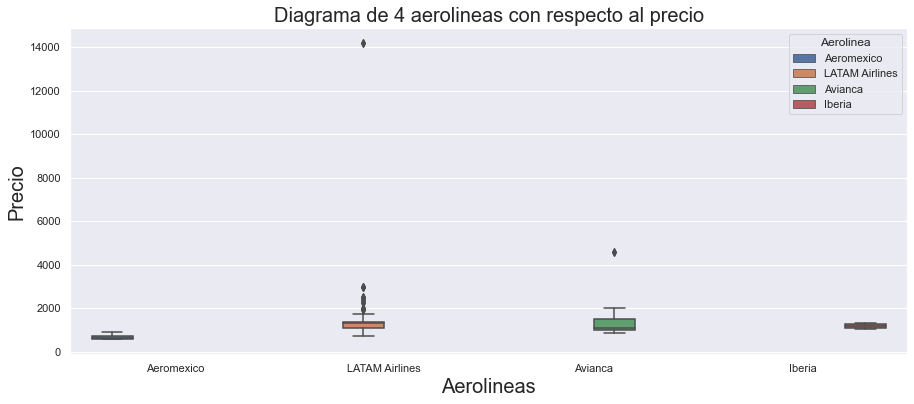

In [162]:
plt.figure(figsize=(15,6))
sns.boxplot(x="Aerolinea", y="Precio", data=valorizadas, hue="Aerolinea")
plt.title("Diagrama de 4 aerolineas con respecto al precio", size=20)
plt.xlabel("Aerolineas", size=20)
plt.ylabel("Precio", size=20)
plt.show()

* A partir de lo mostrado anteriormente, se puede decir que los precios en su mayoria ocilan entre los 500 hasta los 1500. Sin embargo, cabe aclarar que de las 4 aerolineas, la que mas barato sale el boleto del avion, seria **Aeromexico**. Esta aerolinea seria perfecta para el publico que va a Barcelona a hacer estudios universitarios, ya que su finalidad es estudiar, mas no tener un viaje placentero. 

* En segundo lugar, las otras tres aerolineas si llegan a ofrecer, boletos de vuelos mas caros que Aeromexico. Por ejemplo, **LATAM Airlines** ofrece boletos de vuelos que llegan casi hasta los 2000 dolares. Ademas de ello, se puede ver que hay algunos datos atipicos, que se alejan de los demas datos que estan por debajo de los 2000, porque se ve que hay un boleto que cuesta 14000 dolares. Con lo cual se puede decir que esta aerolinea queda perfecta para empresarios que quieran hacer negocios por alla o gente con estudios cualificados, debido a que su poder adquisitivo es mayor que el de un estudiante universitario.

* Por ultimo, el publico objetivo de las aerolineas **Avianca** e **Iberia** se enfocarian solo en personas que van a Barcelona a trabajar o familias que van a hacer una nueva vida por alla. Si bien el precio no varia como **LATAM Airlines**, creo que el precio se ajusta perfectamente a ese publico objetivo.

## Conclusiones.

* La primera conclusion es que los precios entre los dias 9 y 10 de abril se agrupan entre los 500 hasta casi los 2000 dolares americanos, luego de ello, los precios dejan de ser frecuentes para la venta de las aerolineas como es el caso de un boleto de avion a 14000 dolares.

* La segunda, es que con los datos recoplidos, las aerolineas pueden saber cual es su publico objetivo y las personas pueden saber cual aerolineas seria la mas adecuada de acorde a su presupuesto.